# Liberias

In [1]:
# from oficial python
import numpy as np
import matplotlib.pyplot as plt
from qutip import Bloch
from matplotlib import cm
import matplotlib as mpl
from qutip import basis, concurrence, Qobj
import time
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import statistics
import os
from mpl_toolkits.mplot3d import Axes3D
from qutip import concurrence


# own modules:
from dll.spin_procesor_modificated import Quantum_Spin_Proces
from dll.main_fun import make_IRIS_v2, w_r_json, _test, plot_data, visualization_1_qubit, circle_v2
from dll. baseline_dru_v2 import Modelo_DRU
from dll.models import qcircuit_1_qubit_mixed, qcircuit_1_qubit, qcircuit_2_qubit_mixed, qcircuit_4_qubit_mixed
from dll.cost_functions import fidelity_cost, Renyi_Divergence_0_5, Renyi_Divergence_2, Von_Neumman_Divergence_v2, Von_Neumman_Divergence_v3
from dll.gate_procesor_modificated import CompositeGateProcessor

# Visualización por epocas

En esta sección se define el data set de IRIS(3,3), se inicializa el modelo DRU (base line) para un qubit y se entrena con una funcion de costo basada en fidelidad, a 8 epocas. Es importante tener en cuenta que el hiper-parametro <save_process> permite guardar los resultados de entrenamiento:
  * Loss function train
  * Loss function test
  * Acc trin
  * Acc test

In [2]:
X, y =  make_IRIS_v2(2,3)

model = Modelo_DRU(qcircuit_1_qubit_mixed, Von_Neumman_Divergence_v2,
                   epochs = 8, n_clases = 3, n_qubits = 1,
                   features = 2, alpha_noise = 0.0, save_process=True, verbose_test=True)
# splita data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# get parameters
paramters_1q, bias_1q = model.fit(X_train, y_train, X_test, y_test)

Epoch: 100%|██████████| 8/8 [03:01<00:00, 22.69s/it]


              precision    recall  f1-score   support

           0       1.00      0.68      0.81        19
           1       0.87      1.00      0.93        13
           2       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.84      0.84      0.82        45
weighted avg       0.86      0.82      0.82        45



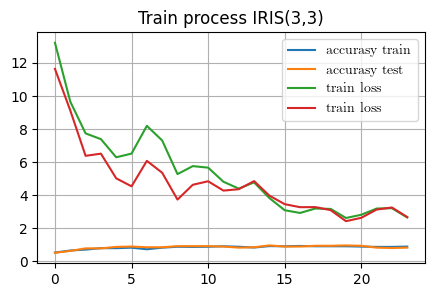

In [3]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(model.acc_train, label = 'accurasy train')
plt.plot(model.acc_test, label = 'accurasy test')
plt.plot(model.loss_list_train, label = 'train loss')
plt.plot(model.loss_list_test, label = 'train loss')
plt.grid()
plt.legend()
plt.title("Train process IRIS(3,3)")
path_to_save_img = os.path.join("results_of_test","test_1","test_1_a.pdf")
plt.savefig(path_to_save_img , format='pdf', bbox_inches = 'tight')
plt.show()

In [2]:
X, y =  make_IRIS_v2(2,3)

model = Modelo_DRU(qcircuit_1_qubit_mixed, Von_Neumman_Divergence_v3,
                   epochs = 8, n_clases = 3, n_qubits = 1,
                   features = 2, alpha_noise = 0.0, save_process=True, verbose_test=True)
# splita data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# get parameters
paramters_1q, bias_1q = model.fit(X_train, y_train, X_test, y_test)

Epoch: 100%|██████████| 8/8 [02:55<00:00, 21.96s/it]


              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       1.00      0.92      0.96        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



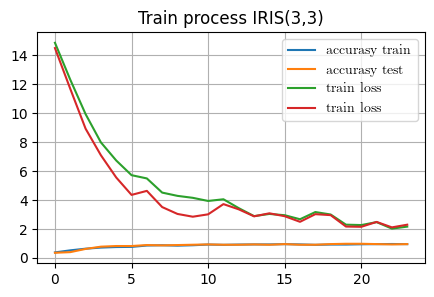

In [3]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(model.acc_train, label = 'accurasy train')
plt.plot(model.acc_test, label = 'accurasy test')
plt.plot(model.loss_list_train, label = 'train loss')
plt.plot(model.loss_list_test, label = 'train loss')
plt.grid()
plt.legend()
plt.title("Train process IRIS(3,3)")
path_to_save_img = os.path.join("results_of_test","test_1","test_1_a.pdf")
plt.savefig(path_to_save_img , format='pdf', bbox_inches = 'tight')
plt.show()

In [18]:
X, y =  make_IRIS_v2(2,3)

model = Modelo_DRU(qcircuit_1_qubit_mixed, Renyi_Divergence_0_5,
                   epochs = 8, n_clases = 3, n_qubits = 1,
                   features = 2, alpha_noise = 0.0, save_process=True)
# splita data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# get parameters
paramters_1q, bias_1q = model.fit(X_train, y_train, X_test, y_test)

Epoch: 100%|██████████| 8/8 [03:19<00:00, 24.95s/it]


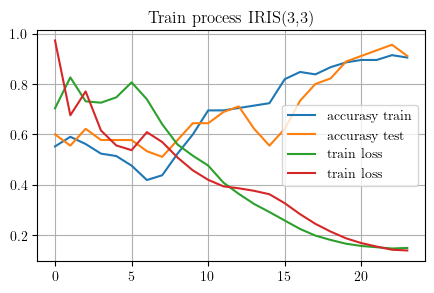

In [19]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(model.acc_train, label = 'accurasy train')
plt.plot(model.acc_test, label = 'accurasy test')
plt.plot(model.loss_list_train, label = 'train loss')
plt.plot(model.loss_list_test, label = 'train loss')
plt.grid()
plt.legend()
plt.title("Train process IRIS(3,3)")
path_to_save_img = os.path.join("results_of_test","test_1","test_1_a_renyi.pdf")
plt.savefig(path_to_save_img , format='pdf', bbox_inches = 'tight')
plt.show()

In [21]:
X, y =  make_IRIS_v2(2,3)

model = Modelo_DRU(qcircuit_1_qubit_mixed, Renyi_Divergence_2,
                   epochs = 8, n_clases = 3, n_qubits = 1,
                   features = 2, alpha_noise = 0.0, save_process=True)
# splita data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# get parameters
paramters_1q, bias_1q = model.fit(X_train, y_train, X_test, y_test)

Epoch: 100%|██████████| 8/8 [03:08<00:00, 23.59s/it]


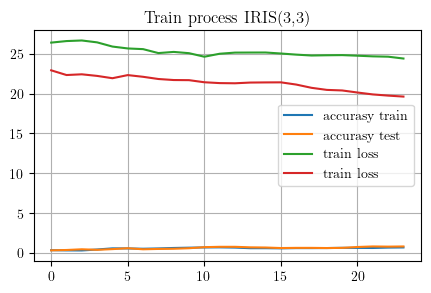

In [22]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(model.acc_train, label = 'accurasy train')
plt.plot(model.acc_test, label = 'accurasy test')
plt.plot(model.loss_list_train, label = 'train loss')
plt.plot(model.loss_list_test, label = 'train loss')
plt.grid()
plt.legend()
plt.title("Train process IRIS(3,3)")
path_to_save_img = os.path.join("results_of_test","test_1","test_1_a_renyi_2.pdf")
plt.savefig(path_to_save_img , format='pdf', bbox_inches = 'tight')
plt.show()

# Visualizacion sobre la esfera de Bloch

En esta seccion se obtiene un resultado cualitativo del proceso de entrenamiento del dataset MAKE MOONS
antes y despues sobre la esfera de Bloch

In [2]:
#  make moons:
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
n_clases = len(set(y)) # get number of classes
_, features = X.shape # get number of features

In [3]:
# Inicializacion del modelo:
model = Modelo_DRU(qcircuit_1_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = n_clases, n_qubits = 1,
                   features = features, alpha_noise = 0.0, save_process=False)

In [4]:
# get parameters after of training:
params_after, bias_after = model.params, model.bias 

In [5]:
# splita data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# get parameters before
paramters_before, bias_before = model.fit(X_train, y_train, X_test, y_test)

Epoch: 100%|██████████| 8/8 [00:38<00:00,  4.76s/it]


In [7]:
predicted_test, fidel_test = _test(qcircuit_1_qubit_mixed,
                                   params_after, model.X_train, model.y_train,
                                   model.state_labels,
                                   bias_after)

<Figure size 500x500 with 0 Axes>

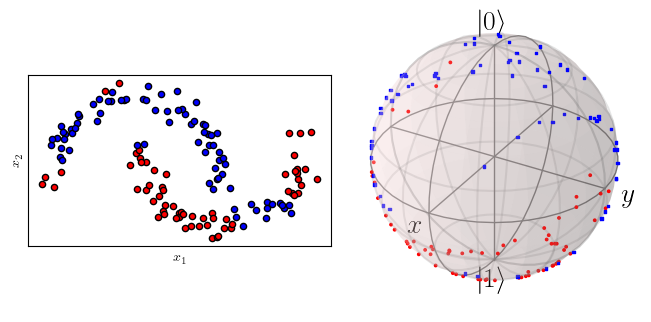

In [13]:
fig = plt.figure(constrained_layout=True)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
ax1 = fig.add_subplot(1, 2, 1)
plot_data(model.X_train, predicted_test, fig, ax1)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_aspect('equal')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
S = 3*np.ones((len(model.y_train)))
visualization_1_qubit(qcircuit_1_qubit, model.X_train, model.y_train, params_after, ax2, sz=S, bias=bias_after)
path_to_save_img = os.path.join("results_of_test","test_1","test_1_bloch_before.pdf")
plt.savefig(path_to_save_img , format='pdf', bbox_inches = 'tight')
plt.show()

In [9]:
predicted_test_before, fidel_test = _test(qcircuit_1_qubit_mixed,
                                   paramters_before, model.X_train, model.y_train,
                                   model.state_labels,
                                  bias_before)

<Figure size 500x500 with 0 Axes>

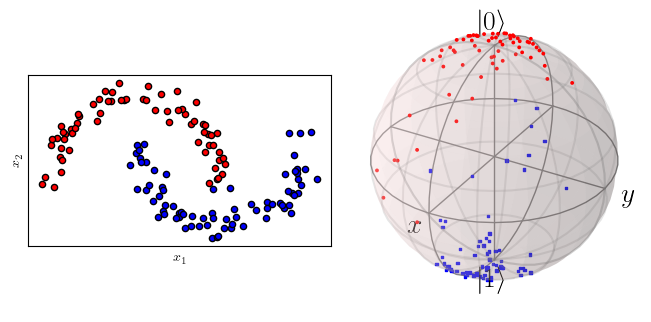

In [14]:
fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plot_data(model.X_train, predicted_test_before, fig, ax1)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_aspect('equal')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
S = 3*np.ones((len(model.y_train)))
visualization_1_qubit(qcircuit_1_qubit, model.X_train, model.y_train, paramters_before, ax2, sz=S, bias=bias_before)
path_to_save_img = os.path.join("results_of_test","test_1","test_1_bloch_after.pdf")
plt.savefig(path_to_save_img , format='pdf', bbox_inches = 'tight')
plt.show()

# 2 qubits con entrelazamiento

El proposito de esta sección es demostrar que las arquitecturas de DRU que tienen compuertas CZ presentan entrelazamiento mediante la concurrencia.

In [91]:
# call dataset:
X, y =  make_IRIS_v2(3,3)

entrelazamiento = True # Activar entrelazamiento
n_clases = len(set(y)) # get number of classes
_, features = X.shape # get number of features

# Inicializacion del modelo:
model = Modelo_DRU(qcircuit_2_qubit_mixed, fidelity_cost,
                   epochs = 10, n_clases = n_clases, n_qubits = 2,
                   features = features, alpha_noise = 0.0,
                   entanglement = entrelazamiento, save_process=True)

# splita data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# get parameters before
paramters_before, bias_before = model.fit(X_train, y_train, X_test, y_test)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 100%|██████████| 10/10 [08:25<00:00, 50.55s/it]


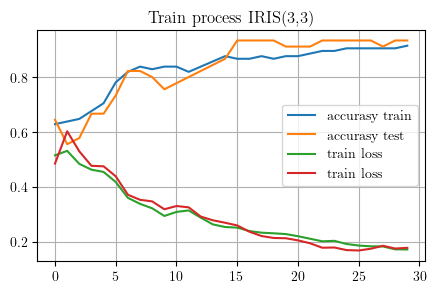

In [92]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(model.acc_train, label = 'accurasy train')
plt.plot(model.acc_test, label = 'accurasy test')
plt.plot(model.loss_list_train, label = 'train loss')
plt.plot(model.loss_list_test, label = 'train loss')
plt.grid()
plt.legend()
plt.title("Train process IRIS(3,3)")
path_to_save_img = os.path.join("results_of_test","test_1","test_1_2qe_trained.pdf")
plt.savefig(path_to_save_img , format='pdf', bbox_inches = 'tight')
plt.show()

In [3]:
# call dataset:
X, y =  make_IRIS_v2(3,3)

entrelazamiento = True # Activar entrelazamiento
n_clases = len(set(y)) # get number of classes
_, features = X.shape # get number of features


# Inicializacion del modelo:
model = Modelo_DRU(qcircuit_2_qubit_mixed, fidelity_cost,
                   epochs = 10, n_clases = n_clases, n_qubits = 2,
                   features = features, alpha_noise = 0.0,
                   entanglement = entrelazamiento,
                   save_process=False,
                   save_w_states = True,
                   path_save_parameters = os.path.join("results_of_test","test_1"),
                   path_save_states = os.path.join("results_of_test","test_1"))

# splita data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# get parameters before
paramters_before, bias_before = model.fit(X_train, y_train, X_test, y_test)

[-0.18962247 -0.68028676 -0.30642056]


Epoch: 100%|██████████| 10/10 [01:07<00:00,  6.75s/it]


[-0.18962247 -0.68028676 -0.30642056]


In [81]:
import re

def detect_entanglement(s):
  # Detectar expresion regular de entrelazamiento
  pattern = r'_entanglement_'
  return bool(re.search(pattern, s))

def generate_ket_states(N):
  # Generar el xticks labels:
  ket_states = [fr'$\rho^{{e}}_{i} $' for i in range(N)]
  return ket_states

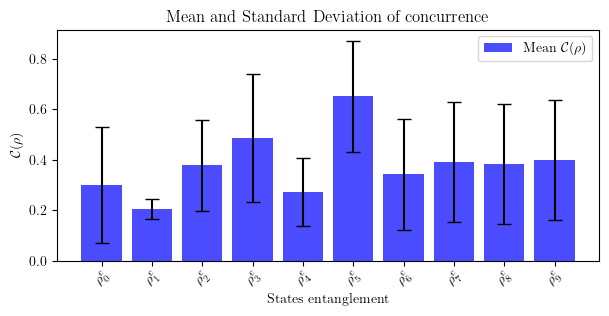

In [90]:
# Leer intra estados modelo:
_, list_states_train = w_r_json("r", os.path.join("results_of_test","test_1","states_after.json"))

Nl = 10 # layers
Concurrence_matrix = np.zeros((len(list_states_train), Nl))
for i in range(len(list_states_train)):
  dict_i = list_states_train[i]
  j = 0
  for key in dict_i:
    tf_entanglement_state = detect_entanglement(key)
    if tf_entanglement_state == True:
      state_qml = dict_i[key]
      # qml to qutip:
      state_qutip = Qobj(state_qml)
      state_qutip.dims = [[2, 2], [2, 2]]
      concurrence_state = concurrence(state_qutip)
      Concurrence_matrix[i,j] = concurrence_state
      j += 1

# Generar xticks labels:
ket_states = generate_ket_states(Nl)

# Calcular el promedio y la desviación estándar de cada columna
mean_values = np.mean(Concurrence_matrix, axis=0)
std_values = np.std(Concurrence_matrix, axis=0)

# Crear el gráfico de barras con barras de error
x = np.arange(len(mean_values))  # La posición de las barras (0, 1, 2, ..., 9)

fig, ax = plt.subplots(figsize=(7, 3))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
ax.bar(x, mean_values, yerr=std_values, capsize=5, alpha=0.7, ecolor='black', color='blue', label = r'Mean $\mathcal{C}(\rho )$')

# Añadir etiquetas y título
ax.set_xlabel('States entanglement')
ax.set_ylabel(r'$\mathcal{C}(\rho )$')
ax.set_title('Mean and Standard Deviation of concurrence')
ax.set_xticks(x)
ax.set_xticklabels(ket_states, rotation=45)
plt.legend()
path_to_save_img = os.path.join("results_of_test","test_1","test_1_2qe_concurrence.pdf")
plt.savefig(path_to_save_img , format='pdf', bbox_inches = 'tight')
plt.show()

# Bechmark DRU in many qubits

In [2]:
X, y = circle_v2(333)

n_clases = len(set(y)) # get number of classes
_, features = X.shape # get number of features

f_loss = Renyi_Divergence_0_5

Nl = 5

Epocas = 12
#save_excel_result

configuration_cases = {
            # MODEL entanglement, floss, Nlayers, Nqubits
  "case_1": [qcircuit_1_qubit_mixed, False, f_loss, Nl, 1],
  "case_2": [qcircuit_2_qubit_mixed, False, f_loss, Nl, 2],
  "case_3": [qcircuit_2_qubit_mixed, True,  f_loss, Nl, 2],
  "case_4": [qcircuit_4_qubit_mixed, False, f_loss, Nl, 4],
  "case_5": [qcircuit_4_qubit_mixed, True,  f_loss, Nl, 4]
}

for key_case in configuration_cases:
  model_i, entanglement, f_loss_i, Nl_i, nq = configuration_cases[key_case]
    # Inicializacion del modelo:
  model = Modelo_DRU(model_i,  f_loss_i,
                    epochs = Epocas, n_clases = n_clases, n_qubits = nq,
                    features = features, alpha_noise = 0.0,
                    entanglement = entanglement, num_layers=Nl_i,
                    save_process=False,
                    save_w_states = False,
                    save_excel_result=True,
                    path_excel_file_result = os.path.join("results_of_test","test_1"))
  # splita data:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
  # get parameters before
  paramters_after, bias_after = model.fit(X_train, y_train, X_test, y_test)

Epoch: 100%|██████████| 12/12 [03:31<00:00, 17.66s/it]
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramet